In [1]:
#import packages for data processing and loading
import json
import pandas as pd

In [2]:
total_cloud_patent={} #empty dict for total cloud patent

In [3]:
#loading the json file and read data
file = "C:/Users/Louisa Zhao/Desktop/CS project/Amazon.json"
f = open(file)
data = json.load(f)

In [5]:
patents_data = data['assignees'][0]['patents']
print("total num of patents in Amazon:{}".format(len(patents_data)))

total num of patents in Amazon:13786


In [6]:
patents_data[0]['patent_abstract'] #browse the first abstract

'The disclosed unmanned aerial vehicle (UAV) includes a buoyant airbag, a drive unit, a retention feature, and an onboard control module that can be configured to cause the drive unit to displace the UAV, cause the retention feature to retain one or more items for transport, and receive instructions to transfer items from one location to another. For example, a UAV can be controlled to obtain an item at one location in a warehouse such as a first floor, lift said item to a second location in the warehouse such as a second floor, and deposit the item at the second location.'

In [7]:
#list of total patents' abstract 
patent_cloud_data = []
for patent in patents_data:
    abstract = patent['patent_abstract']
    if abstract:
        if 'cloud' in abstract:
            patent_cloud_data.append(patent)

In [9]:
print("total num of cloud patents in Amazon:{}".format(len(patent_cloud_data)))

total num of cloud patents in Amazon:140


In [10]:
df = pd.DataFrame(patent_cloud_data,index=None) #convert the data into dataframe

In [11]:
total_cloud_patent['Amazon Technologies, Inc.'] = (len(patents_data),len(patent_cloud_data))

In [12]:
csv_path = "C:/Users/Louisa Zhao/Desktop/CS project/cloud patent csv/Amazon cloud.csv"
df.to_csv(csv_path,index=False)

In [13]:
def clean_cloud_data(company,file, csv_file):
    '''
    This function is to clean json data into csv file 
    Columns in csv: patent num, patent date, patent citation num,
    patent kind,patent abstract, patent id
    input: 
    company: str, company name
    file: str,json file path 
    csv_file: output csv file path
    '''
    f = open(file)
    data = json.load(f)
    patents_data = data['assignees'][0]['patents']
    total_patent = len(patents_data)
    patent_cloud_data = []
    for patent in patents_data:
        abstract = patent['patent_abstract']
        if abstract:
            if 'cloud' in abstract:
                patent_cloud_data.append(patent)
    cloud_patent = len(patent_cloud_data)
    total_cloud_patent[company] = (total_patent,cloud_patent)
    
    df = pd.DataFrame(patent_cloud_data,index=None)
    df.to_csv(csv_file,index=False)

Google data cleaning

In [37]:
g_file = "C:/Users/Louisa Zhao/Desktop/CS project/Google.json"
g_company = "Google Inc."
g_csv_file =  "C:/Users/Louisa Zhao/Desktop/CS project/cloud patent csv/Google cloud.csv"

In [38]:
clean_cloud_data(g_company,g_file,g_csv_file)

Microsoft data cleaning

In [39]:
m_file = "C:/Users/Louisa Zhao/Desktop/CS project/Microsoft.json"
m_company = "Microsoft Corporation"
m_csv_file =  "C:/Users/Louisa Zhao/Desktop/CS project/cloud patent csv/Microsoft cloud.csv"

In [40]:
clean_cloud_data(m_company,m_file,m_csv_file)

salesforce:

In [41]:
m_file = "C:/Users/Louisa Zhao/Desktop/CS project/salesforce.json"
m_company = "salesforce.com, inc."
m_csv_file =  "C:/Users/Louisa Zhao/Desktop/CS project/cloud patent csv/Salesforce cloud.csv"

In [42]:
clean_cloud_data(m_company,m_file,m_csv_file)

RingCentral/rackspace:

In [49]:
m_file = "C:/Users/Louisa Zhao/Desktop/CS project/oracle.json"
m_company = "Oracle International Corporation"
m_csv_file =  "C:/Users/Louisa Zhao/Desktop/CS project/cloud patent csv/oracle cloud.csv"
clean_cloud_data(m_company,m_file,m_csv_file)

Oracle data

In [64]:
f = open(m_file)
data = json.load(f)
patents_data = data['assignees'][1]['patents']
total_patent = len(patents_data)
patent_cloud_data = []
for patent in patents_data:
    abstract = patent['patent_abstract']
    if abstract:
        if 'cloud' in abstract:
            patent_cloud_data.append(patent)
cloud_patent = len(patent_cloud_data)
total_cloud_patent[m_company] = (total_patent,cloud_patent)

df = pd.DataFrame(patent_cloud_data,index=None)
df.to_csv(m_csv_file,index=False)

In [65]:
total_cloud_patent

{'Amazon': (13786, 140),
 'Amazon Technologies, Inc.': (13786, 140),
 'Google Inc.': (23149, 224),
 'Microsoft Corporation': (45286, 588),
 'salesforce.com, inc.': (2110, 64),
 'RingCentral, Inc.': (209, 8),
 'rackspace': (87, 38),
 'NTT': (557, 0),
 'Oracle International Corporation': (7740, 252)}

In [66]:
del total_cloud_patent['NTT']

In [67]:
total_cloud_patent

{'Amazon': (13786, 140),
 'Amazon Technologies, Inc.': (13786, 140),
 'Google Inc.': (23149, 224),
 'Microsoft Corporation': (45286, 588),
 'salesforce.com, inc.': (2110, 64),
 'RingCentral, Inc.': (209, 8),
 'rackspace': (87, 38),
 'Oracle International Corporation': (7740, 252)}

In [73]:
total_patent = [values[0] for key,values in total_cloud_patent.items()]
cloud_patent = [values[1] for key,values in total_cloud_patent.items()]
company = [key for key,values in total_cloud_patent.items()]
proportion = [values[1]/values[0] for key,values in total_cloud_patent.items()]

# Viz for total company's cloud services

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon'),
  Text(1, 0, 'Amazon Technologies, Inc.'),
  Text(2, 0, 'Google Inc.'),
  Text(3, 0, 'Microsoft Corporation'),
  Text(4, 0, 'salesforce.com, inc.'),
  Text(5, 0, 'RingCentral, Inc.'),
  Text(6, 0, 'rackspace'),
  Text(7, 0, 'Oracle International Corporation')])

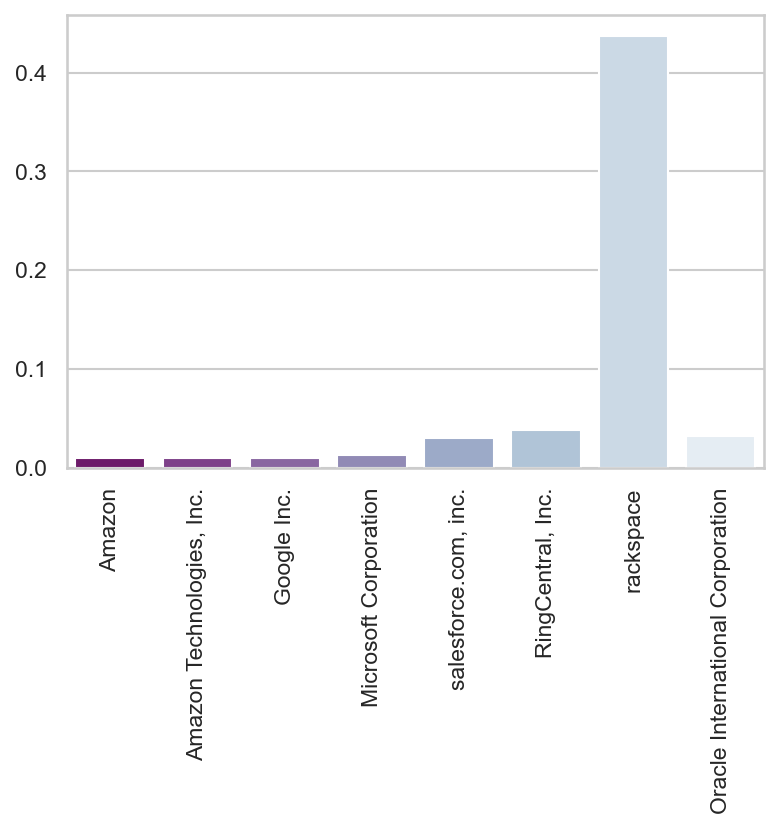

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=150)
g = sns.barplot(company, proportion,palette = "BuPu_r")
plt.xticks(rotation=90)



C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon'),
  Text(1, 0, 'Amazon Technologies, Inc.'),
  Text(2, 0, 'Google Inc.'),
  Text(3, 0, 'Microsoft Corporation'),
  Text(4, 0, 'salesforce.com, inc.'),
  Text(5, 0, 'RingCentral, Inc.'),
  Text(6, 0, 'rackspace'),
  Text(7, 0, 'Oracle International Corporation')])

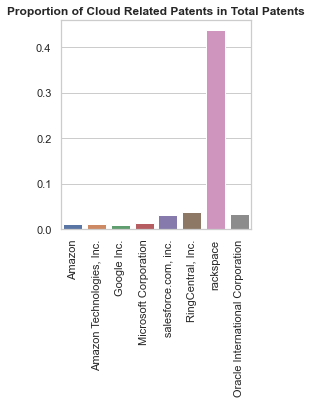

In [96]:
fig, bar = plt.subplots(figsize = (3.41,3.84))
bar = sns.barplot(company, proportion)
bar.set_title('Proportion of Cloud Related Patents in Total Patents',fontdict= { 'fontweight':'bold'})
plt.xticks(rotation=90)

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


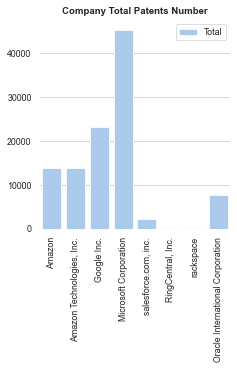

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

f, ax = plt.subplots(figsize = (3.41,3.84))
sns.set_color_codes('pastel')
sns.barplot(company, total_patent,
            label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
#sns.barplot(company,cloud_patent, 
            #label = 'Cloud', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.xticks(rotation=90)
plt.title('Company Total Patents Number',fontdict= { 'fontweight':'bold'})
plt.show()

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


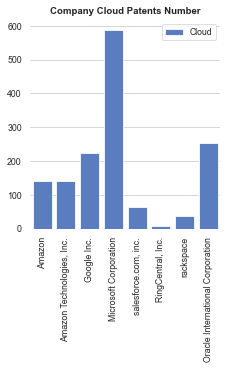

In [110]:
f, ax = plt.subplots(figsize = (3.41,3.84))
sns.set_color_codes('pastel')
sns.set_color_codes('muted')
sns.barplot(company,cloud_patent, 
            label = 'Cloud', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.xticks(rotation=90)
plt.title('Company Cloud Patents Number',fontdict= { 'fontweight':'bold'})
plt.show()

Viz for Classification

In [124]:
Amazon = {'H04L': 82,
 'G06F': 79,
 'G06Q': 17,
 'H04N': 11,
 'G06K': 7,
 'H04W': 7,
 'H04M': 6,
 'G10L': 4,
 'G06T': 4,
 'A61K': 3,
 'G06N': 2,
 'H04R': 2,
 'B25J': 1,
 'G05D': 1}

In [115]:
def viz_class(viz_dict,company):
    x = [key for key,values in viz_dict.items()]
    y = [values for key,values in viz_dict.items()]
    plt.subplots(figsize = (3.41,3.84))
    sns.barplot(x, y,palette = "BuPu_r")
    title_viz = "{} Cloud Patents Classification".format(company)
    plt.title(title_viz,fontdict= { 'fontweight':'bold'})
    plt.xticks(rotation=90)

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


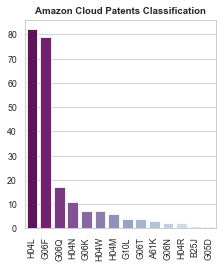

In [125]:
viz_class(Amazon,"Amazon")

In [122]:
Google = {'G06F': 121,
 'H04L': 88,
 'G06Q': 35,
 'H04W': 29,
 'G08B': 23,
 'G06K': 19,
 'H04N': 17,
 'G06T': 16,
 'G01S': 16,
 'G05D': 15,
 'G05B': 15,
 'B25J': 12,
 'G01C': 8,
 'G06N': 6,
 'B60W': 6}

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


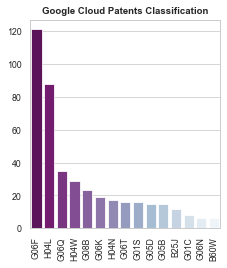

In [123]:
viz_class(Google,"Google")

In [127]:
Microsoft = {'G06F': 293,
 'H04L': 274,
 'H04W': 56,
 'G06Q': 45,
 'G06T': 17,
 'H04N': 16,
 'H04M': 14,
 'G06K': 13,
 'G06N': 11,
 'Y02D': 11,
 'A63F': 6,
 'G01S': 6,
 'B25J': 5,
 'Y10S': 5,
 'G01C': 4}

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


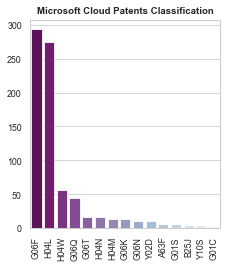

In [128]:
viz_class(Microsoft,"Microsoft")